In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [3]:
data = pd.read_csv("train.csv")

In [4]:
test= pd.read_csv("test.csv")

In [5]:
data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


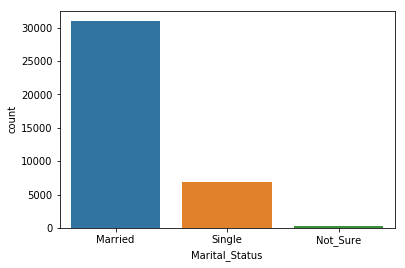

In [6]:
sns.countplot(x = "Marital_Status", data = data)

In [7]:
target_count = data.Promoted_or_Not.value_counts()
Married_sit = data.Marital_Status.value_counts()
print(Married_sit)

Married     31022
Single       6927
Not_Sure      363
Name: Marital_Status, dtype: int64


In [8]:
print("Class 0", target_count[0])
print("Class 1", target_count[1])

Class 0 35071
Class 1 3241


In [9]:
print("The ratio of the target variables is\n", round(target_count[0]/target_count[1], 2), ":1")

The ratio of the target variables is
 10.82 :1


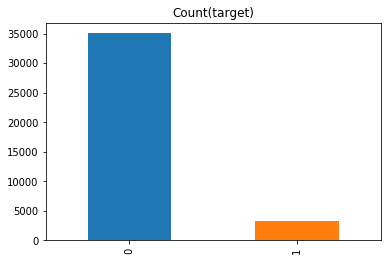

In [10]:
target_count.plot(kind = "bar", title = "Count(target)")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [12]:
data.isnull().any()

EmployeeNo                             False
Division                               False
Qualification                           True
Gender                                 False
Channel_of_Recruitment                 False
Trainings_Attended                     False
Year_of_birth                          False
Last_performance_score                 False
Year_of_recruitment                    False
Targets_met                            False
Previous_Award                         False
Training_score_average                 False
State_Of_Origin                        False
Foreign_schooled                       False
Marital_Status                         False
Past_Disciplinary_Action               False
Previous_IntraDepartmental_Movement    False
No_of_previous_employers               False
Promoted_or_Not                        False
dtype: bool

In [13]:
data.Qualification.unique()

array(['MSc, MBA and PhD', 'First Degree or HND', nan,
       'Non-University Education'], dtype=object)

In [14]:
data.Qualification.ffill(axis = 0, inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          38312 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [16]:
data.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


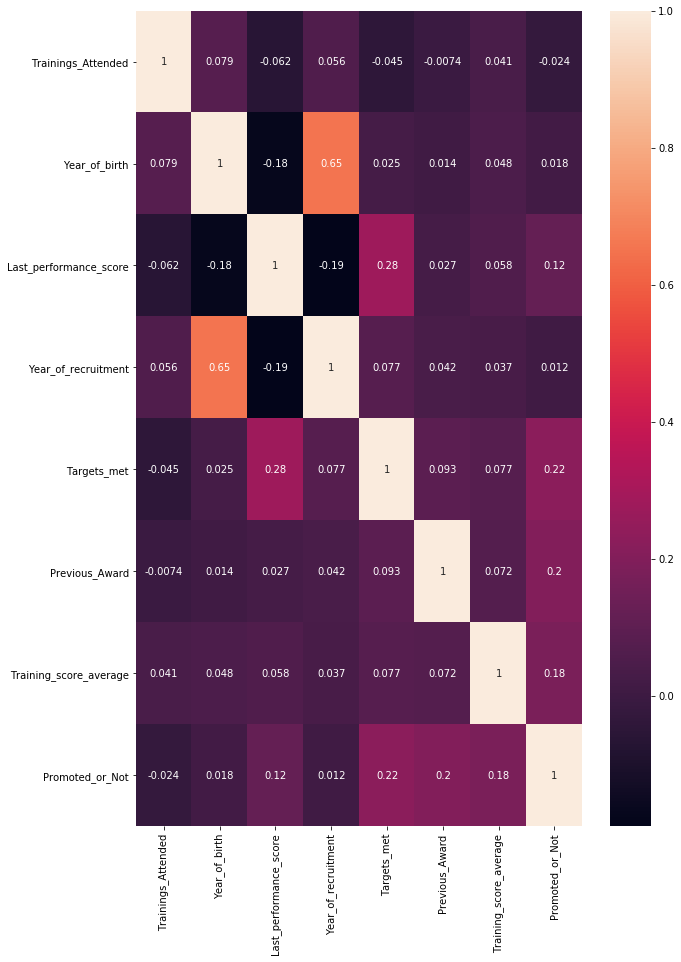

In [17]:
plt.figure(figsize=(10,15))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [18]:
dataset = data.drop(["EmployeeNo"], axis = 1, inplace = True)

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [20]:
data["Gender"]=le.fit_transform(data["Gender"])
data["Division"]=le.fit_transform(data["Division"])
data["Qualification"]=le.fit_transform(data["Qualification"])
data["Channel_of_Recruitment"]=le.fit_transform(data["Channel_of_Recruitment"])
data["State_Of_Origin"]=le.fit_transform(data["State_Of_Origin"])
data["Foreign_schooled"]=le.fit_transform(data["Foreign_schooled"])
data["Past_Disciplinary_Action"]=le.fit_transform(data["Past_Disciplinary_Action"])
data["Marital_Status"]=le.fit_transform(data["Marital_Status"])
data["Previous_IntraDepartmental_Movement"]=le.fit_transform(data["Previous_IntraDepartmental_Movement"])
data["No_of_previous_employers"]=le.fit_transform(data["No_of_previous_employers"])

In [21]:
data.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,1,1,0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0,0
1,2,0,1,0,2,1991,12.5,2015,0,0,52,3,1,0,0,0,0,0
2,1,0,1,1,2,1987,7.5,2012,0,0,42,20,1,0,0,0,0,0
3,1,0,1,0,3,1982,2.5,2009,0,0,42,26,1,2,0,0,1,0
4,4,0,1,1,3,1990,7.5,2012,0,0,77,2,1,0,0,0,1,0


In [22]:
X = data.drop(["Promoted_or_Not"], axis = 1)
y = data["Promoted_or_Not"]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =0)

In [25]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 200, random_state = 0)
Classifier.fit(X_train,y_train)
Predictions = Classifier.predict(X_test)

C:\Users\User_Pc\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,Predictions))
print(accuracy_score(y_test,Predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      7007
          1       0.89      0.30      0.44       656

avg / total       0.93      0.94      0.92      7663

0.9367088607594937


#### In the above, we discovered that the target varaiable is unbalanced hence we will use sampling techniques on the dependent variable and perform the operation again to compare the accuracy of our models

#### Visualizing which of the features has the largest effect on our model

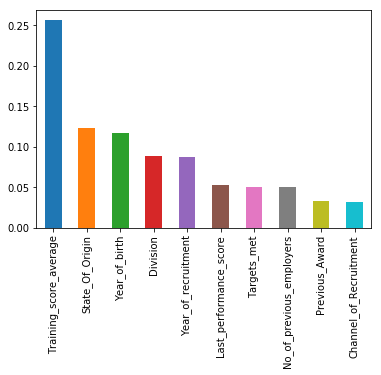

In [27]:
feat_importance = pd.Series(Classifier.feature_importances_, index = X.columns)
feat_importance.nlargest(10).plot(kind = "bar")

In [28]:
count_class_0,coun_class_1 = data["Promoted_or_Not"].value_counts()

In [29]:
data_class_0 = data[data["Promoted_or_Not"] == 0]
data_class_1 = data[data["Promoted_or_Not"] == 1]

In [30]:
data_class_1_over = data_class_1.sample(count_class_0, replace = True)
data_test_over = pd.concat([data_class_0, data_class_1_over], axis = 0)

In [31]:
print("Random over sampling")
print(data_test_over.Promoted_or_Not.value_counts())

Random over sampling
1    35071
0    35071
Name: Promoted_or_Not, dtype: int64


In [32]:
data_test_over.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,1,1,0,1,2,1986,12.5,2011,1,0,41,3,0,0,0,0,0,0
1,2,0,1,0,2,1991,12.5,2015,0,0,52,3,1,0,0,0,0,0
2,1,0,1,1,2,1987,7.5,2012,0,0,42,20,1,0,0,0,0,0
3,1,0,1,0,3,1982,2.5,2009,0,0,42,26,1,2,0,0,1,0
4,4,0,1,1,3,1990,7.5,2012,0,0,77,2,1,0,0,0,1,0


In [33]:
X1 = data_test_over.drop(["Promoted_or_Not"], axis = 1)
y1 = data_test_over["Promoted_or_Not"]

In [34]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2, random_state =0)

In [35]:
from sklearn.ensemble import RandomForestClassifier
Classifier1 = RandomForestClassifier(n_estimators = 200, random_state = 0)
Classifier1.fit(X1_train,y1_train)
Predictions1 = Classifier1.predict(X1_test)

In [36]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y1_test,Predictions1))
print(accuracy_score(y1_test,Predictions1))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99      6916
          1       0.98      1.00      0.99      7113

avg / total       0.99      0.99      0.99     14029

0.991446289828213


#### The above accuracy of 99% is a significant improvement from the accuracy we got without sampling our data hence the need for sampling

In [37]:
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [38]:
test_data = test.drop(["EmployeeNo"], axis = 1, inplace = True)

In [39]:
test.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [40]:
test.isnull().any()

Division                               False
Qualification                           True
Gender                                 False
Channel_of_Recruitment                 False
Trainings_Attended                     False
Year_of_birth                          False
Last_performance_score                 False
Year_of_recruitment                    False
Targets_met                            False
Previous_Award                         False
Training_score_average                 False
State_Of_Origin                        False
Foreign_schooled                       False
Marital_Status                         False
Past_Disciplinary_Action               False
Previous_IntraDepartmental_Movement    False
No_of_previous_employers               False
dtype: bool

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 17 columns):
Division                               16496 non-null object
Qualification                          15766 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         16496 non-null object
Past_Disciplinary_Action               164

In [42]:
test.Qualification.ffill(axis = 0, inplace = True)

In [43]:
test.Qualification.value_counts().sum()

16496

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [45]:
test["Gender"]=le.fit_transform(test["Gender"])
test["Division"]=le.fit_transform(test["Division"])
test["Qualification"]=le.fit_transform(test["Qualification"])
test["Channel_of_Recruitment"]=le.fit_transform(test["Channel_of_Recruitment"])
test["State_Of_Origin"]=le.fit_transform(test["State_Of_Origin"])
test["Foreign_schooled"]=le.fit_transform(test["Foreign_schooled"])
test["Past_Disciplinary_Action"]=le.fit_transform(test["Past_Disciplinary_Action"])
test["Marital_Status"]=le.fit_transform(test["Marital_Status"])
test["Previous_IntraDepartmental_Movement"]=le.fit_transform(test["Previous_IntraDepartmental_Movement"])
test["No_of_previous_employers"]=le.fit_transform(test["No_of_previous_employers"])

In [46]:
test.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,3,0,1,0,2,1976,7.5,2017,0,0,65,14,1,0,0,0,1
1,3,0,1,1,2,1991,0.0,2018,0,0,69,27,1,0,0,0,1
2,7,1,1,1,2,1984,7.5,2012,0,0,76,19,1,0,0,0,1
3,2,0,1,0,2,1984,2.5,2009,0,0,52,32,0,2,0,0,1
4,3,0,1,0,2,1983,7.5,2014,1,0,69,14,1,0,0,0,0


In [47]:
Predictions1 = Classifier1.predict(test)

In [51]:
Predictions1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Converting the numpy array into a csv file for better visuals

In [56]:
df = pd.DataFrame(Predictions1)
df.to_csv("file.csv", index = False)

#### Hence accessing the file, we go to file.csv in the same directory as the file you worked with